<a href="https://colab.research.google.com/github/MohmedAAK/-Advanced-computer-vision-v1/blob/main/Advanced%20computer%20vision/lec1_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#download image

In [ ]:
import urllib.request

urllib.request.urlretrieve("https://media.threatpost.com/wp-content/uploads/sites/103/2019/09/26105755/fish-1.jpg", "local-filename.jpg")

('local-filename.jpg', <http.client.HTTPMessage at 0x7f3d39ac2850>)

#filter funcation

In [ ]:
import numpy as np
import copy as co
import copy
import cv2
from google.colab.patches import cv2_imshow
# return sum of the mask after multplication
def sum_mtrx(matrx):
    x=0
    for i in range(len(matrx)):
        for j in range(len(matrx[0])):
           x+= (matrx[i][j])
    return x
#return mask reuslt on one pixel
def masker(mask,x,y,img,edg=0):
    temp = co.deepcopy(mask[:][:])
    rows=len(temp)
    clomns=len(temp[0])
    mid=int(rows/2)
    for i in range(rows):
        for j in range(clomns):
            if 0<=x - mid + i<len(img) and 0<=y - mid + j<len(img[0]) :
                temp[i][j] *= (img[x - mid + i][y - mid + j])
            else:
                temp[i][j]=edg

    res = (sum_mtrx(temp))
    return int(res)
#apply mask on image    
def fun_mask(mask,img):
  cv2_imshow(img) #task2
  copy=co.deepcopy(img[:][:])
  for i in range(len(img)):
      for j in range(len(img[0])):
        img[i][j]= int(masker(mask,i,j,copy))
  cv2_imshow(img) #task2
  return img
# the image
img = cv2.imread("/content/local-filename.jpg",0)
img = cv2.resize(img, (200,200), cv2.INTER_LINEAR)

#Blur

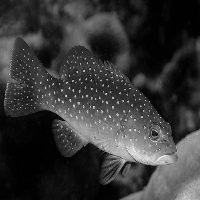

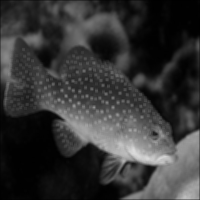

array([[ 10,  15,  15, ...,   2,   4,   3],
       [ 15,  23,  23, ...,   3,   6,   5],
       [ 16,  24,  23, ...,   3,   5,   5],
       ...,
       [  1,   2,   2, ..., 154, 153, 101],
       [  1,   1,   2, ..., 159, 157, 104],
       [  0,   1,   2, ..., 108, 105,  69]], dtype=uint8)

In [ ]:
mask=[[1/9,1/9,1/9],
      [1/9,1/9,1/9],
      [1/9,1/9,1/9]]
fun_mask(mask,co.deepcopy(img))

#Sharpening 

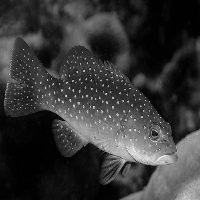

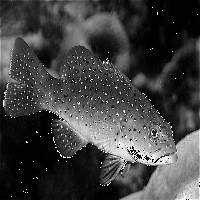

In [ ]:
mask=[[-1/9,-1/9,-1/9],
      [-1/9,2-(1/9),-1/9],
      [-1/9,-1/9,-1/9]]
fun_mask(mask,co.deepcopy(img))

#Gaussian function

1.0000000000000002


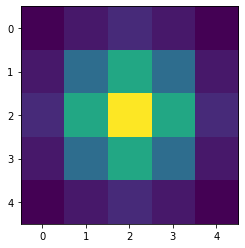

In [ ]:
import math
import numpy as np
def Gaussian_function(x,y,segma):
  return (1 / ((2 * np.pi) * segma**2)) * np.e ** -((np.power(x,2)+np.power(y,2))/(2*np.power(segma,2)))
def create_kernal_g(kernel_size,segma=0):
  if segma==0:
    segma=math.sqrt(kernel_size)
  arr=np.zeros([kernel_size,kernel_size])
  mid=int(kernel_size/2)
  for i in range(kernel_size):
    for j in range(kernel_size):
      arr[i][j]=Gaussian_function(i-mid,j-mid,segma)
  #print(arr)    
  maxe=sum([sum(i) for i in arr])
  #arr=list([list(i) for i in arr])#deeeeeeaaaarrrrr
  for i in range(kernel_size):
    for j in range(kernel_size):
      #print(arr[i][j],i,j,arr)
      arr[i][j]*=1/maxe
      #arr[i][j]*=
      #print(arr[i][j],i,j)
  return arr    
arr=create_kernal_g(5,1)
print(sum([sum(i) for i in arr]))
import matplotlib.pyplot as plt
plt.imshow(arr)

pix 3


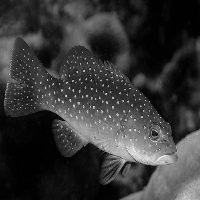

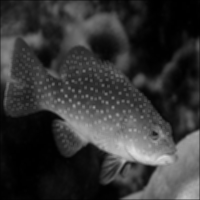

pix 5


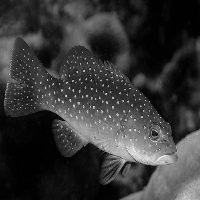

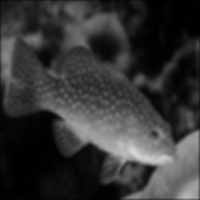

pix 10


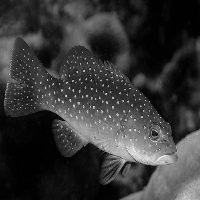

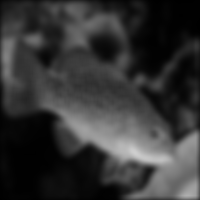

array([[  7,   9,  10, ...,   1,   1,   1],
       [  9,  11,  13, ...,   1,   1,   1],
       [ 11,  13,  16, ...,   1,   1,   1],
       ...,
       [  1,   1,   1, ..., 112,  95,  76],
       [  0,   1,   1, ...,  97,  82,  66],
       [  0,   0,   1, ...,  79,  67,  54]], dtype=uint8)

In [ ]:
img = cv2.imread("/content/local-filename.jpg",0)
img = cv2.resize(img, (200,200), cv2.INTER_LINEAR)
print("pix 3")   
fun_mask(create_kernal_g(3),co.deepcopy(img))
print("pix 5")            
fun_mask(create_kernal_g(5),co.deepcopy(img))
print("pix 10")   
fun_mask(create_kernal_g(10),co.deepcopy(img))

#sharping revisted

blur


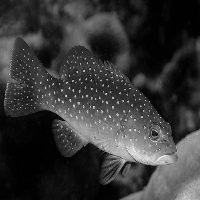

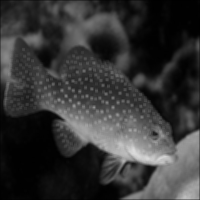

0------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


sharping


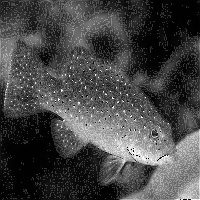

In [ ]:
mask=[[1/9,1/9,1/9],
      [1/9,1/9,1/9],
      [1/9,1/9,1/9]]
print("blur")      
image_som = fun_mask(mask,co.deepcopy(img))
print("0------------")
orginal= co.deepcopy(img)
details=np.zeros([len(orginal),len(orginal[0])])
for i in range(len(orginal)):
  for j in range(len(orginal[0])):
    details[i][j]=orginal[i][j]-image_som[i][j]
seg=1.2
for i in range(len(img)):
  for j in range(len(img[0])):
    orginal[i][j]=orginal[i][j]+seg*details[i][j]
print("sharping")     
cv2_imshow(orginal)

#Thresholding

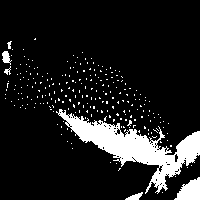

In [ ]:
orginal1= co.deepcopy(img)
for i in range(len(orginal)):
  for j in range(len(orginal[0])):
    if orginal1[i][j]>122:
      orginal1[i][j]=255
    else:
      orginal1[i][j]=0 
cv2_imshow(orginal1)